### Ignore Warnings

In [2]:
import warnings 
warnings.filterwarnings("ignore")

### Important Softwares & Packages to be installed :
- **graphviz** : You can download Tree Visualization from here : https://graphviz.gitlab.io/download/
- packages like **pandas, numpy, matplotlib, seaborn, sklearn, pydotplus, graphviz** 
    - pip install **packageName** to install a package 
    - If you are using Anaconda distribution some of the packages come with Anaconda but for others like pydotplus and graphviz use pip install   

## Spotify Song Attributes EDA
- Import required Libraries & dataset from Kaggle
- Exploratory Data Analysis to analyse and visualize the dataset, to observe structure and to identify the main characteristics 
- Train a Decision Tree Classifier and a RandomForest Classifier
- Predict Target in our case Song is liked or Disliked using our trained classifiers

### Import required Libraries

###### Basic Libraries for Data Extraction, Visualization & EDA

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###### Machine Learning Modelling & Splitting

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

###### Visualize the Tree & Export to png

In [5]:
from sklearn.tree import export_graphviz
import graphviz
import pydotplus
import io
from scipy import misc

###### Get the Data from Kaggle - https://www.kaggle.com/geomack/spotifyclassification

###### Reading imported data

In [6]:
dataset_path = 'D:\\MyCodes\\Python\\Datasets\\Spotify-Data\\'
songs_df = pd.read_csv( dataset_path + 'Spotify-Song-Attributes.csv' )
songs_df = songs_df.drop(songs_df.columns[0], axis=1) # Drop 1st column with row numbers
songs_df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [7]:
songs_df.info() 
# No Missing Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 16 columns):
acousticness        2017 non-null float64
danceability        2017 non-null float64
duration_ms         2017 non-null int64
energy              2017 non-null float64
instrumentalness    2017 non-null float64
key                 2017 non-null int64
liveness            2017 non-null float64
loudness            2017 non-null float64
mode                2017 non-null int64
speechiness         2017 non-null float64
tempo               2017 non-null float64
time_signature      2017 non-null float64
valence             2017 non-null float64
target              2017 non-null int64
song_title          2017 non-null object
artist              2017 non-null object
dtypes: float64(10), int64(4), object(2)
memory usage: 252.2+ KB


In [8]:
songs_df.isna().any()
# No Null Values

acousticness        False
danceability        False
duration_ms         False
energy              False
instrumentalness    False
key                 False
liveness            False
loudness            False
mode                False
speechiness         False
tempo               False
time_signature      False
valence             False
target              False
song_title          False
artist              False
dtype: bool

In [62]:
songs_df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


### Data-Visualization

###### Set the Color Pallete using Seaborn

In [63]:
colors = ["#6abdb2","#003087"]
color_pallete = sns.color_palette( colors )
sns.set_palette( color_pallete )
sns.set_style('white') # White background

###### Uni-variate Analysis - Tempo v/s Song Like/Dislike (target)

In [64]:
# Songs Liked & Disliked v/s tempo
pos_tempo = songs_df[songs_df['target'] == 1]['tempo']
neg_tempo = songs_df[songs_df['target'] == 0]['tempo']

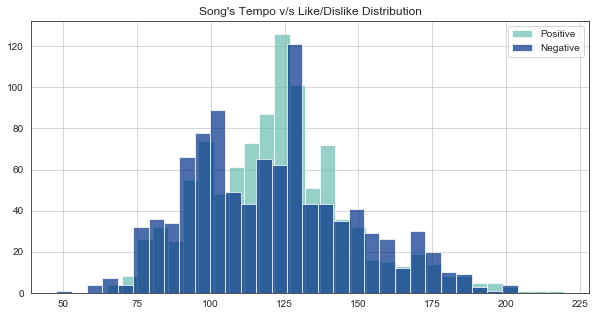

In [65]:
plt.figure( figsize=(10,5) )
plt.title('Song\'s Tempo v/s Like/Dislike Distribution')
pos_tempo.hist( alpha=0.7, bins=30, label='Positive' )
neg_tempo.hist( alpha=0.7, bins=30, label='Negative' )
plt.legend( loc='upper right' )
plt.show()

###### Uni-variate Analysis - Danceability v/s Song Like/Dislike (target)

In [66]:
# Songs Liked & Disliked v/s Danceability
pos_dance = songs_df[songs_df['target'] == 1]['danceability']
neg_dance = songs_df[songs_df['target'] == 0]['danceability']
# Songs Liked & Disliked v/s Danceability
pos_energy = songs_df[songs_df['target'] == 1]['energy']
neg_energy = songs_df[songs_df['target'] == 0]['energy']

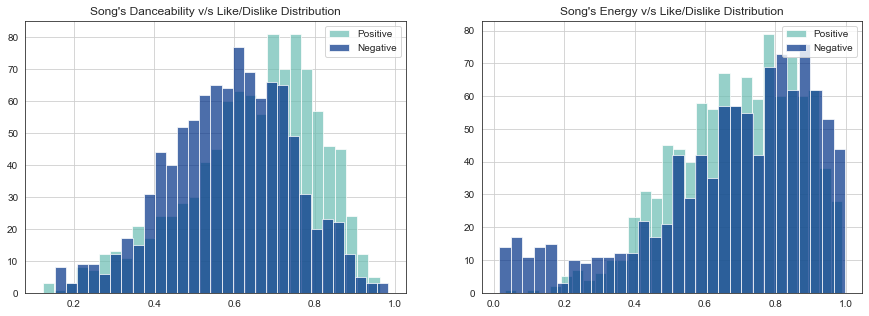

In [67]:
plt.figure( figsize=(15,5) )
plt.subplot(1,2,1)
plt.title('Song\'s Danceability v/s Like/Dislike Distribution')
pos_dance.hist( alpha=0.7, bins=30, label='Positive' )
neg_dance.hist( alpha=0.7, bins=30, label='Negative' )
plt.legend( loc='upper right' )
plt.subplot(1,2,2)
plt.title('Song\'s Energy v/s Like/Dislike Distribution')
pos_energy.hist( alpha=0.7, bins=30, label='Positive' )
neg_energy.hist( alpha=0.7, bins=30, label='Negative' )
plt.legend( loc='upper right' )
plt.show()

###### Generate Arrays for All values for Univariate Analysis

In [68]:
# Songs Liked & Disliked 
# v/s acousticness
pos_acousticness = songs_df[songs_df['target'] == 1]['acousticness']
neg_acousticness = songs_df[songs_df['target'] == 0]['acousticness']
# v/s duration_ms
pos_duration_ms = songs_df[songs_df['target'] == 1]['duration_ms']
neg_duration_ms = songs_df[songs_df['target'] == 0]['duration_ms']
# v/s instrumentalness
pos_instrumentalness = songs_df[songs_df['target'] == 1]['instrumentalness']
neg_instrumentalness = songs_df[songs_df['target'] == 0]['instrumentalness']
# v/s key
pos_key = songs_df[songs_df['target'] == 1]['key']
neg_key = songs_df[songs_df['target'] == 0]['key']
# v/s liveness
pos_liveness = songs_df[songs_df['target'] == 1]['liveness']
neg_liveness = songs_df[songs_df['target'] == 0]['liveness']
# v/s loudness
pos_loudness = songs_df[songs_df['target'] == 1]['loudness']
neg_loudness = songs_df[songs_df['target'] == 0]['loudness']
# v/s speechiness
pos_speechiness = songs_df[songs_df['target'] == 1]['speechiness']
neg_speechiness = songs_df[songs_df['target'] == 0]['speechiness']
# v/s time_signature
pos_time_signature = songs_df[songs_df['target'] == 1]['time_signature']
neg_time_signature = songs_df[songs_df['target'] == 0]['time_signature']
# v/s valence
pos_valence = songs_df[songs_df['target'] == 1]['valence']
neg_valence = songs_df[songs_df['target'] == 0]['valence']

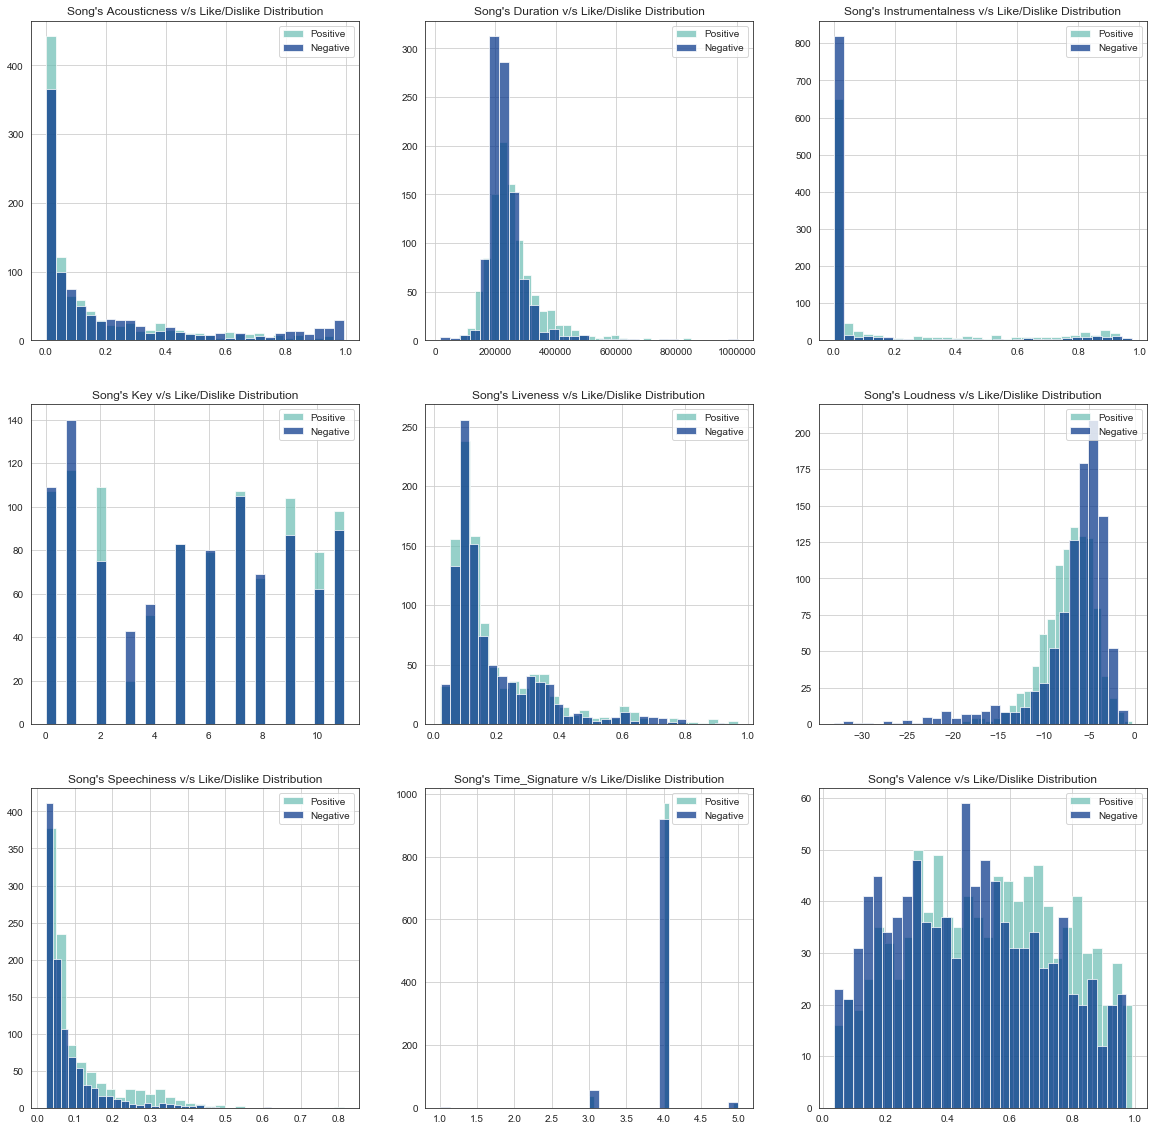

In [69]:
plt.figure(figsize=(20,20))

plt.subplot(3,3,1)
plt.title('Song\'s Acousticness v/s Like/Dislike Distribution')
pos_acousticness.hist( alpha=0.7, bins=30, label='Positive' )
neg_acousticness.hist( alpha=0.7, bins=30, label='Negative' )
plt.legend( loc='upper right' )

plt.subplot(3,3,2)
plt.title('Song\'s Duration v/s Like/Dislike Distribution')
pos_duration_ms.hist( alpha=0.7, bins=30, label='Positive' )
neg_duration_ms.hist( alpha=0.7, bins=30, label='Negative' )
plt.legend( loc='upper right' )

plt.subplot(3,3,3)
plt.title('Song\'s Instrumentalness v/s Like/Dislike Distribution')
pos_instrumentalness.hist( alpha=0.7, bins=30, label='Positive' )
neg_instrumentalness.hist( alpha=0.7, bins=30, label='Negative' )
plt.legend( loc='upper right' )

plt.subplot(3,3,4)
plt.title('Song\'s Key v/s Like/Dislike Distribution')
pos_key.hist( alpha=0.7, bins=30, label='Positive' )
neg_key.hist( alpha=0.7, bins=30, label='Negative' )
plt.legend( loc='upper right' )

plt.subplot(3,3,5)
plt.title('Song\'s Liveness v/s Like/Dislike Distribution')
pos_liveness.hist( alpha=0.7, bins=30, label='Positive' )
neg_liveness.hist( alpha=0.7, bins=30, label='Negative' )
plt.legend( loc='upper right' )

plt.subplot(3,3,6)
plt.title('Song\'s Loudness v/s Like/Dislike Distribution')
pos_loudness.hist( alpha=0.7, bins=30, label='Positive' )
neg_loudness.hist( alpha=0.7, bins=30, label='Negative' )
plt.legend( loc='upper right' )

plt.subplot(3,3,7)
plt.title('Song\'s Speechiness v/s Like/Dislike Distribution')
pos_speechiness.hist( alpha=0.7, bins=30, label='Positive' )
neg_speechiness.hist( alpha=0.7, bins=30, label='Negative' )
plt.legend( loc='upper right' )

plt.subplot(3,3,8)
plt.title('Song\'s Time_Signature v/s Like/Dislike Distribution')
pos_time_signature.hist( alpha=0.7, bins=30, label='Positive' )
neg_time_signature.hist( alpha=0.7, bins=30, label='Negative' )
plt.legend( loc='upper right' )

plt.subplot(3,3,9)
plt.title('Song\'s Valence v/s Like/Dislike Distribution')
pos_valence.hist( alpha=0.7, bins=30, label='Positive' )
neg_valence.hist( alpha=0.7, bins=30, label='Negative' )
plt.legend( loc='upper right' )

plt.show()

###### So below are the inferences:
- Speechiness : User dislikes songs with lesser words
- Loudness : User dislikes songs which are too loud
- Danceability : User likes songs which he/she can dance to
- Valence : Has a normal bias
- Duration : User dislikes songs which are of longer duration
- Keys : User doesnt like the songs in lower keys
- Energy : User doesnt like lower energy songs
- Acousticness : Lower acoustic songs are preferred by the user

###### Drop Song,Title & Artist before going for Modelling

In [70]:
songs_df = songs_df.drop( ['song_title','artist'], axis=1 )

### Machine Learning Modelling & Classifier

In [71]:
X = songs_df.drop(['target'], axis=1)
y = songs_df.target.values

In [72]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size=0.15)
# X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size=0.10, random_state=10, shuffle=True)

print( 'X_train', X_train.shape, ' | X_test', X_test.shape )
print( 'y_train', y_train.shape, ' | y_test', y_test.shape )

X_train (1714, 13)  | X_test (303, 13)
y_train (1714,)  | y_test (303,)


In [73]:
decision_tree_classifier = DecisionTreeClassifier( min_samples_split=100 )
print( decision_tree_classifier )

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [74]:
decision_tree = decision_tree_classifier.fit( X_train, y_train )

In [75]:
def generateTree( tree, features, path ):
    file = io.StringIO()
    export_graphviz( tree, out_file=file, feature_names=features )
    pydot_graph = pydotplus.graph_from_dot_data(file.getvalue())
    pydot_graph.set_size('"45,30!"')
    pydot_graph.write_png(path)

In [76]:
import os
if not os.path.exists('.\\Tree-Images\\Spotify\\'):
    os.makedirs('.\\Tree-Images\\Spotify\\')

In [77]:
localPath = '.\\Tree-Images\\Spotify\\'
generateTree( decision_tree, X.columns, localPath + 'decision_tree_3.png' )

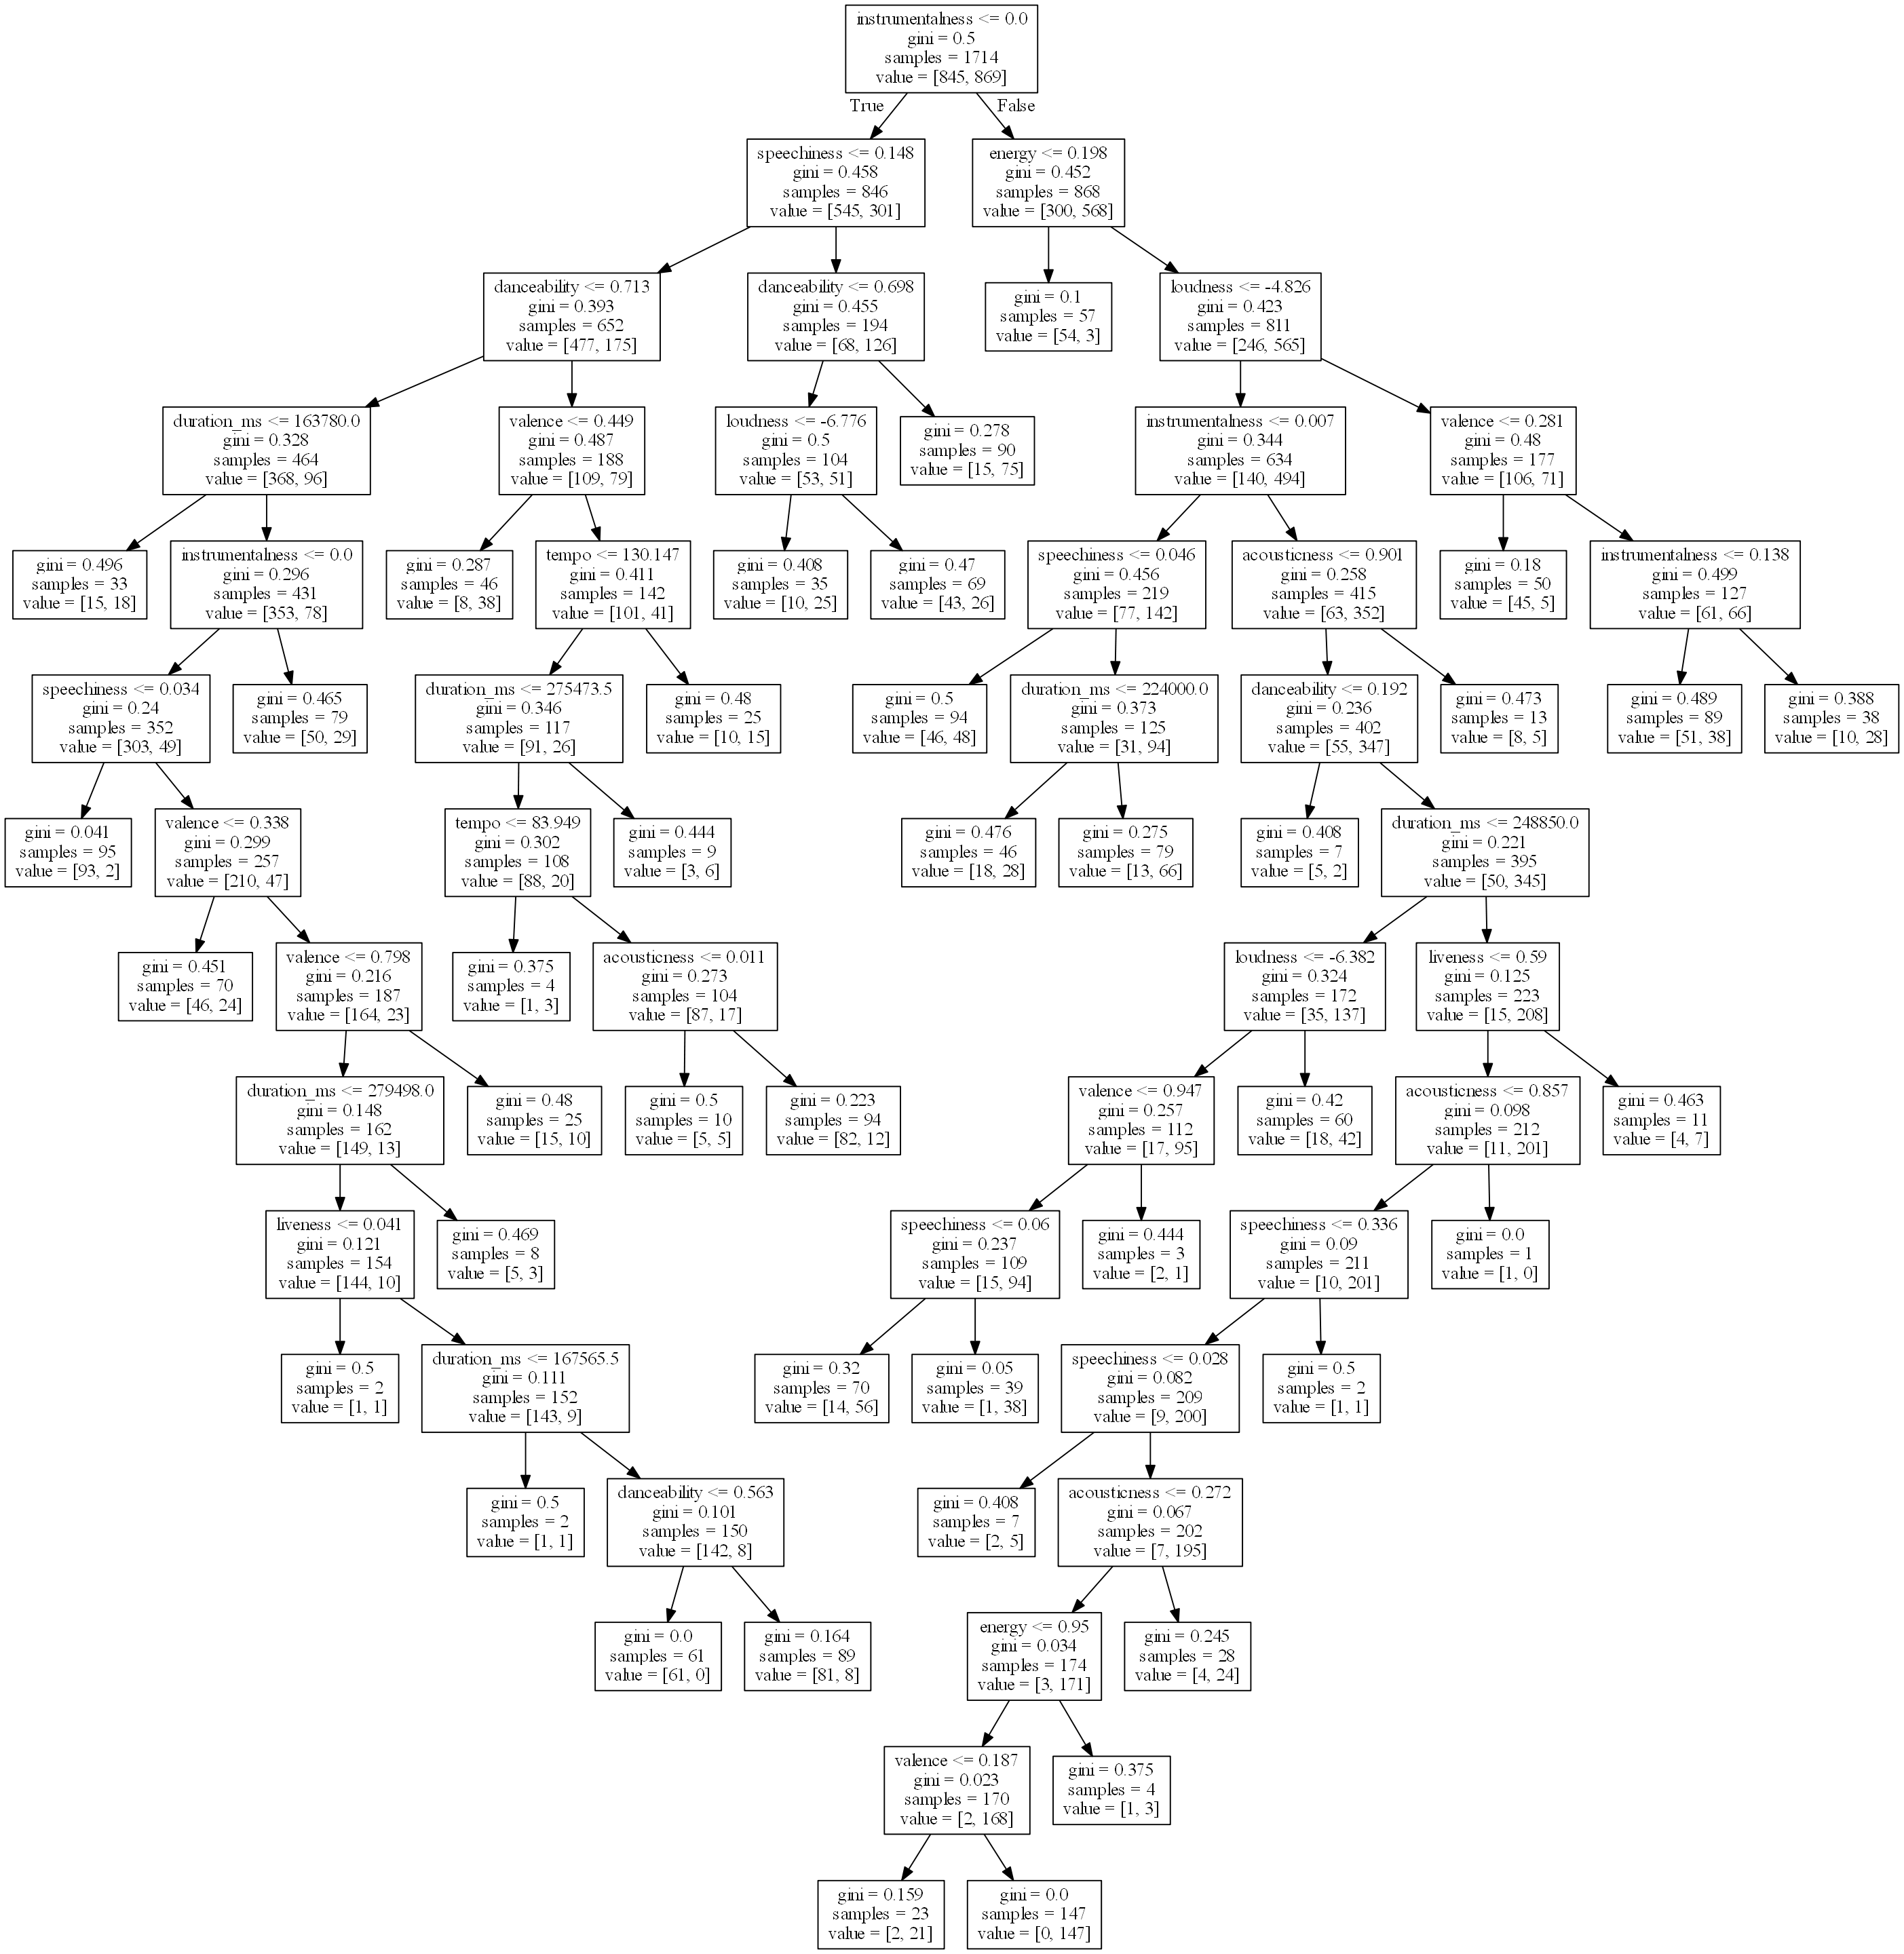

In [1]:
from IPython.display import Image, display
display(Image(filename='Tree-Images/Spotify/decision_tree_3.png', embed=True))

In [78]:
y_pred = decision_tree_classifier.predict( X_test )

In [79]:
accuracy_score_DT = accuracy_score( y_test, y_pred )
print( 'Decision Tree Accuracy Score 100 Splits: ',  round(accuracy_score_DT*100,4), '%' )

Decision Tree Accuracy Score 100 Splits:  69.3069 %


In [80]:
localPath = '.\\Tree-Images\\Spotify\\'
dictAccuracy_RF = {}
dictAccuracy_DT = {}
loopValueList = []

In [81]:
testDict = {}

def generateMultipleModels(loopStart, loopEnd, classifierName):
    X = songs_df.drop(['target'], axis=1)
    y = songs_df.target.values
    X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size=0.15)
    valList = range(loopStart,loopEnd+1,10)
    for i in valList:
        if(classifierName!='DecisionTree' and classifierName!='RandomForest'):
            return
        elif(classifierName == 'DecisionTree'):
            model_classifier = DecisionTreeClassifier( min_samples_split=i )
            decision_tree = model_classifier.fit( X_train, y_train )
            generateTree( decision_tree, X.columns, localPath + 'decision_tree_' + str(i) + '.png' )
        elif(classifierName == 'RandomForest'):
            model_classifier = RandomForestClassifier(n_estimators=i, random_state=42)
            model_classifier.fit( X_train, y_train )
            
        y_pred = model_classifier.predict( X_test )
        model_accuracy = accuracy_score( y_test, y_pred )
        
        testDict.update( {i:round(model_accuracy*100,4)} )
        
        if(classifierName == 'DecisionTree'):
            print( classifierName + ' Accuracy Score for ' + str(i) + ' Splits: ',  round(model_accuracy*100,4), '%' )
        else:
            print( classifierName + ' Accuracy Score for ' + str(i) + ' Estimators: ',  round(model_accuracy*100,4), '%' )
    return valList,testDict

In [82]:
decision_tree_classifier = DecisionTreeClassifier( min_samples_split=100 )
decision_tree = decision_tree_classifier.fit( X_train, y_train )
generateTree( decision_tree, X.columns, localPath + 'decision_tree_best_2.png' )
y_pred = decision_tree_classifier.predict( X_test )
accuracy_score_DT = accuracy_score( y_test, y_pred )
print( 'Decision Tree Accuracy Score for 100 Splits: ',  round(accuracy_score_DT*100,4), '%' )

Decision Tree Accuracy Score for 100 Splits:  69.3069 %


### Random Forest Classifier

In [83]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size=0.15)

print( 'X_train', X_train.shape, ' | X_test', X_test.shape )
print( 'y_train', y_train.shape, ' | y_test', y_test.shape )

X_train (1714, 13)  | X_test (303, 13)
y_train (1714,)  | y_test (303,)


In [84]:
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest = random_forest_classifier.fit( X_train, y_train )
y_pred = random_forest.predict( X_test )
accuracy_score_RF = accuracy_score( y_test, y_pred )
print( 'Random Forest Accuracy Score 100 Estimators: ',  round(accuracy_score_RF*100,4), '%' )

Random Forest Accuracy Score 100 Estimators:  81.1881 %


### Generate Multiple Models & Compare

In [85]:
loopValueList, dictAccuracy_RF = generateMultipleModels(50, 200, 'RandomForest')

RandomForest Accuracy Score for 50 Estimators:  81.5182 %
RandomForest Accuracy Score for 60 Estimators:  81.8482 %
RandomForest Accuracy Score for 70 Estimators:  81.1881 %
RandomForest Accuracy Score for 80 Estimators:  81.1881 %
RandomForest Accuracy Score for 90 Estimators:  82.1782 %
RandomForest Accuracy Score for 100 Estimators:  82.1782 %
RandomForest Accuracy Score for 110 Estimators:  81.8482 %
RandomForest Accuracy Score for 120 Estimators:  82.5083 %
RandomForest Accuracy Score for 130 Estimators:  82.1782 %
RandomForest Accuracy Score for 140 Estimators:  82.5083 %
RandomForest Accuracy Score for 150 Estimators:  82.8383 %
RandomForest Accuracy Score for 160 Estimators:  82.5083 %
RandomForest Accuracy Score for 170 Estimators:  82.8383 %
RandomForest Accuracy Score for 180 Estimators:  82.5083 %
RandomForest Accuracy Score for 190 Estimators:  82.1782 %
RandomForest Accuracy Score for 200 Estimators:  82.1782 %


In [86]:
loopValueList, dictAccuracy_DT = generateMultipleModels(50, 200, 'DecisionTree')

DecisionTree Accuracy Score for 50 Splits:  74.2574 %
DecisionTree Accuracy Score for 60 Splits:  73.9274 %
DecisionTree Accuracy Score for 70 Splits:  73.5974 %
DecisionTree Accuracy Score for 80 Splits:  72.6073 %
DecisionTree Accuracy Score for 90 Splits:  72.9373 %
DecisionTree Accuracy Score for 100 Splits:  72.2772 %
DecisionTree Accuracy Score for 110 Splits:  73.2673 %
DecisionTree Accuracy Score for 120 Splits:  73.9274 %
DecisionTree Accuracy Score for 130 Splits:  70.9571 %
DecisionTree Accuracy Score for 140 Splits:  71.6172 %
DecisionTree Accuracy Score for 150 Splits:  70.9571 %
DecisionTree Accuracy Score for 160 Splits:  71.6172 %
DecisionTree Accuracy Score for 170 Splits:  71.2871 %
DecisionTree Accuracy Score for 180 Splits:  70.6271 %
DecisionTree Accuracy Score for 190 Splits:  69.637 %
DecisionTree Accuracy Score for 200 Splits:  69.967 %


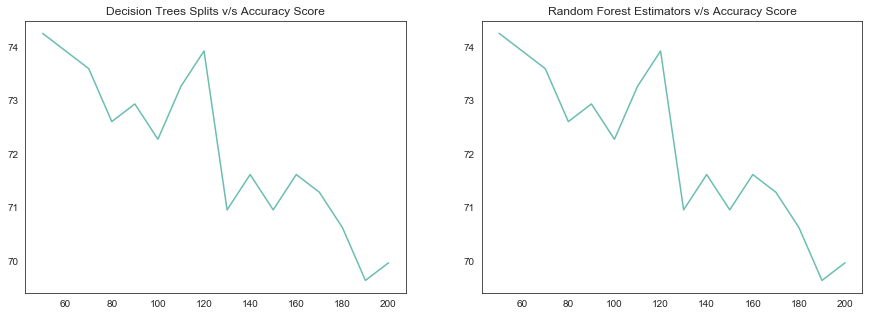

In [87]:
plt.figure( figsize=(15,5) )
plt.subplot(1,2,1)
plt.title('Decision Trees Splits v/s Accuracy Score')
sns.lineplot(loopValueList, list(dictAccuracy_DT.values()))
plt.subplot(1,2,2)
plt.title('Random Forest Estimators v/s Accuracy Score')
sns.lineplot(loopValueList, list(dictAccuracy_RF.values()))
plt.show()

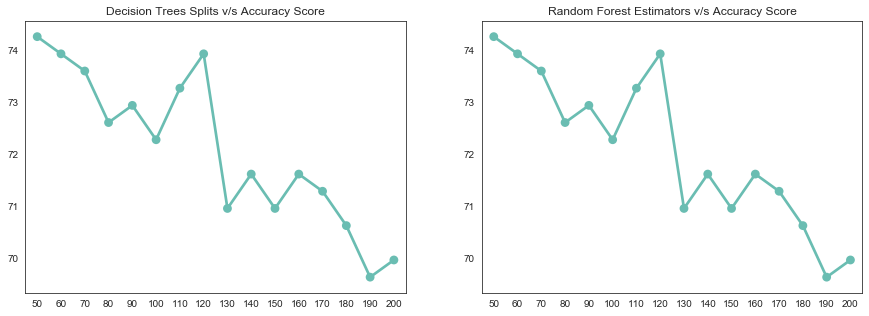

In [88]:
plt.figure( figsize=(15,5) )
plt.subplot(1,2,1)
plt.title('Decision Trees Splits v/s Accuracy Score')
sns.pointplot(list(loopValueList), list(dictAccuracy_DT.values()))
plt.subplot(1,2,2)
plt.title('Random Forest Estimators v/s Accuracy Score')
sns.pointplot(list(loopValueList), list(dictAccuracy_RF.values()))
plt.show()

### Final Conclusion :
- During EDA we found that no missing or no null values present in the dataset
- Since we had to predict if the User likes or dislikes a song so it was a Classification Problem so I thought of using the Decision Tree & Random Forest Algorithms 
- The Random Forest Algorithm provides better accuracy than Decision Trees 